In [ ]:
# Colab Notebook: Sensor ML Model - UCI HAR Dataset
# ================================================

# Install necessary packages
!pip install scikit-learn pandas matplotlib seaborn

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
!curl -L "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip" --output "UCI_HAR_Dataset.zip"
!unzip -q "UCI_HAR_Dataset.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M    0 58.1M    0     0  23.9M      0 --:--:--  0:00:02 --:--:-- 23.9M    0 --:--:--  0:00:02 --:--:-- 23.8M


In [32]:
# Load features and labels
X_train = pd.read_csv("UCI HAR Dataset/train/X_train_archana.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv("UCI HAR Dataset/test/X_test_archana.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train_archana.txt", header=None)[0]
y_test = pd.read_csv("UCI HAR Dataset/test/y_test_archana.txt", header=None)[0]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7352, 99) (2947, 99) (7352,) (2947,)


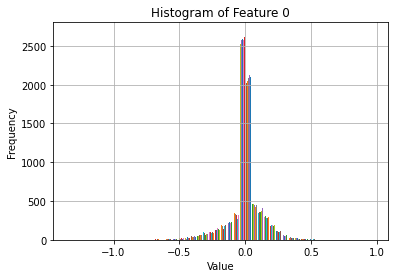

In [28]:
# Example: Load one sensor axis for visualization
x_accel_train = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', 
                            delim_whitespace=True, header=None)
y_accel_train = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', 
                            delim_whitespace=True, header=None)
z_accel_train = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', 
                            delim_whitespace=True, header=None)

# Load activity labels
y_train = pd.read_csv("UCI HAR Dataset/train/y_train_archana.txt", header=None)[0]

plt.hist(y_accel_train, bins=50)
plt.title("Histogram of Feature 0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

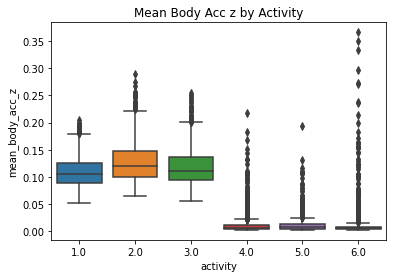

In [30]:
# Take the mean of the 128 values per window
x_accel_mean = x_accel_train.abs().mean(axis=1)
y_accel_mean = y_accel_train.abs().mean(axis=1)
z_accel_mean = z_accel_train.abs().mean(axis=1)

df = pd.DataFrame({
    "mean_body_acc_z": z_accel_mean,
    "activity": y_train
})

sns.boxplot(x="activity", y="mean_body_acc_z", data=df)
plt.title("Mean Body Acc z by Activity")
plt.show()

In [ ]:
# Normalize data, use standardscaler from scikit-learn, which is a preprocessing tool.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #on the training data, we learn mean and sd, 
#and apply normalization, which is transform part to make it 0 mean, sd 1 rv.
X_test = scaler.transform(X_test) # on the test data, just transform but don't learn mean and std

In [16]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.82      0.82       496
         2.0       0.80      0.88      0.84       471
         3.0       0.90      0.79      0.84       420
         4.0       0.87      0.85      0.86       491
         5.0       0.87      0.88      0.87       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



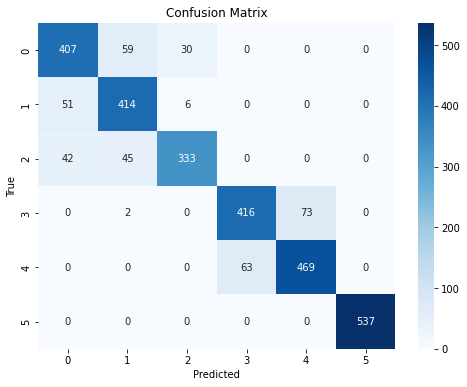

In [33]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

              precision    recall  f1-score   support

         1.0       0.71      0.89      0.79       496
         2.0       0.76      0.77      0.77       471
         3.0       0.88      0.62      0.73       420
         4.0       0.99      0.34      0.51       491
         5.0       0.62      0.98      0.76       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.78      2947
   macro avg       0.83      0.77      0.76      2947
weighted avg       0.83      0.78      0.76      2947



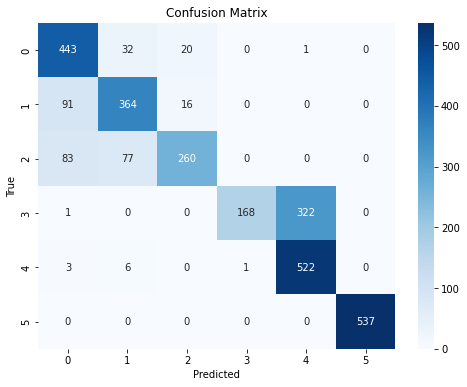

In [37]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   1.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END .......................C=1, gamma=scale,

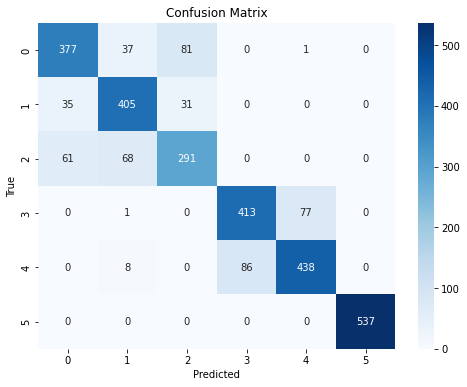

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=2)
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_

y_pred_svm = best_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


              precision    recall  f1-score   support

         1.0       0.81      0.86      0.83       496
         2.0       0.91      0.83      0.87       471
         3.0       0.85      0.86      0.86       420
         4.0       0.90      0.80      0.85       491
         5.0       0.84      0.92      0.88       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947



/Users/archu/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


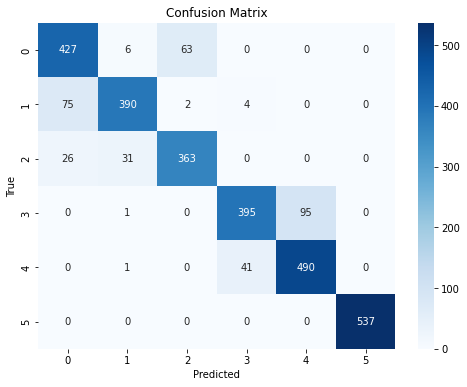

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver='lbfgs',     # good for multiclass
    multi_class='multinomial',
    max_iter=1000,      # increase to ensure convergence
    random_state=42
)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [41]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=100,
                    activation='relu',
                    solver='adam',
                    max_iter=300,
                    random_state=42)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=42)

              precision    recall  f1-score   support

         1.0       0.85      0.77      0.81       496
         2.0       0.77      0.93      0.84       471
         3.0       0.85      0.75      0.80       420
         4.0       0.94      0.75      0.84       491
         5.0       0.81      0.95      0.87       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.87      0.86      0.86      2947
weighted avg       0.87      0.86      0.86      2947



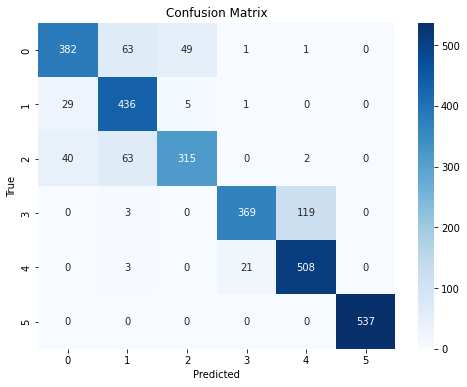

In [42]:
y_pred_nn = mlp.predict(X_test)
print(classification_report(y_test, y_pred_nn))
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [43]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.2 MB/s eta 0:00:0000:010:01


In [47]:
import xgboost as xgb

# XGboost does not need normalization, use the original data as is
X_train = pd.read_csv("UCI HAR Dataset/train/X_train_archana.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv("UCI HAR Dataset/test/X_test_archana.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train_archana.txt", header=None)[0]
y_test = pd.read_csv("UCI HAR Dataset/test/y_test_archana.txt", header=None)[0]

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

xgb_clf = xgb.XGBClassifier(objective='softmax',
                            num_class = 6,
                            eval_metric='mlogloss',
                            use_label_encoder=False,
                            random_state=42)
xgb_clf.fit(X_train,y_train-1) #xgb expects labels to be zero indexed

(7352, 99) (2947, 99) (7352,) (2947,)


/Users/archu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:23:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

         1.0       0.86      0.90      0.88       496
         2.0       0.88      0.87      0.88       471
         3.0       0.89      0.85      0.87       420
         4.0       0.90      0.83      0.86       491
         5.0       0.85      0.92      0.89       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



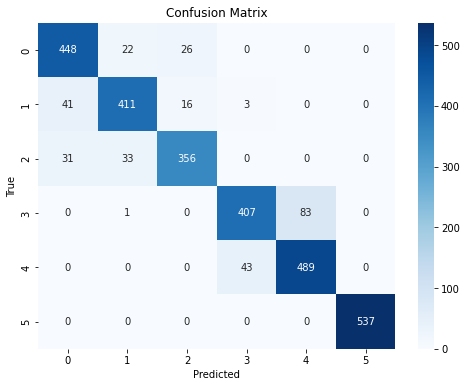

In [52]:
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb+1))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb+1), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [56]:
#Grid search on XGboost algorithm
param_grid = {
    'max_depth': [4, 6, 8], #Tree depth, controlls complexity
    'learning_rate': [0.05, 0.1, 0.2], #step size shrinking
    'n_estimators': [100, 300, 500], #number of boosting rounds (trees)
    'subsample': [0.8, 1.0], #fraction of rows to sample per tree
    'colsample_bytree': [0.8, 1.0], #fraction of features to sample by tree
}

xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=6,
    eval_metric='mlogloss',
    random_state=42
)

grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1) #cv=3 means: 
grid.fit(X_train, y_train-1)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

              precision    recall  f1-score   support

         1.0       0.87      0.92      0.89       496
         2.0       0.90      0.91      0.90       471
         3.0       0.92      0.86      0.89       420
         4.0       0.91      0.84      0.87       491
         5.0       0.87      0.93      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



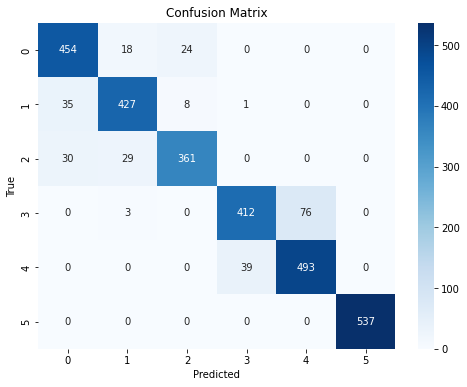

In [58]:
best_model = grid.best_estimator_
y_pred_xgb_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb_best+1))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_best+1), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()